In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import math
import numpy as np

In [59]:
queue_types = ["mm1", "md1","prior1", "mlt1"]

saved_means = {}
stds = {}

for queue_type in queue_types:
    df = pd.read_csv("data/" + queue_type + "_means.csv")
    if queue_type == "mlt1":
        df.columns = ["rho","arrive", "waitingtime", "len_queue"]
    else: df.columns = ["rho", "waitingtime", "len_queue"]

    rhos = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
    print(rhos)
    means_per_rho = []
    stds_per_rho = []

    for rho in rhos:
        print("queue: ", queue_type, "rho: ", rho)

        mean = df[df["rho"] == rho]["waitingtime"].mean()
        std = df[df["rho"] == rho]["waitingtime"].std()

        means_per_rho.append(mean)
        stds_per_rho.append(std)

    saved_means[queue_type] = means_per_rho
    stds[queue_type] = stds_per_rho

    print(queue_type, "-done")

[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
queue:  mm1 rho:  0.1
queue:  mm1 rho:  0.2
queue:  mm1 rho:  0.3
queue:  mm1 rho:  0.4
queue:  mm1 rho:  0.5
queue:  mm1 rho:  0.6
queue:  mm1 rho:  0.7
queue:  mm1 rho:  0.8
queue:  mm1 rho:  0.9
mm1 -done
[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
queue:  md1 rho:  0.1
queue:  md1 rho:  0.2
queue:  md1 rho:  0.3
queue:  md1 rho:  0.4
queue:  md1 rho:  0.5
queue:  md1 rho:  0.6
queue:  md1 rho:  0.7
queue:  md1 rho:  0.8
queue:  md1 rho:  0.9
md1 -done
[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
queue:  prior1 rho:  0.1
queue:  prior1 rho:  0.2
queue:  prior1 rho:  0.3
queue:  prior1 rho:  0.4
queue:  prior1 rho:  0.5
queue:  prior1 rho:  0.6
queue:  prior1 rho:  0.7
queue:  prior1 rho:  0.8
queue:  prior1 rho:  0.9
prior1 -done
[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
queue:  mlt1 rho:  0.1
queue:  mlt1 rho:  0.2
queue:  mlt1 rho:  0.3
queue:  mlt1 rho:  0.4
queue:  mlt1 rho:  0.5
queue:  mlt1 rho:  0.6
queue:  mlt1 rho:  0.7


queue:  mlt1 rho:  0.8
queue:  mlt1 rho:  0.9
mlt1 -done


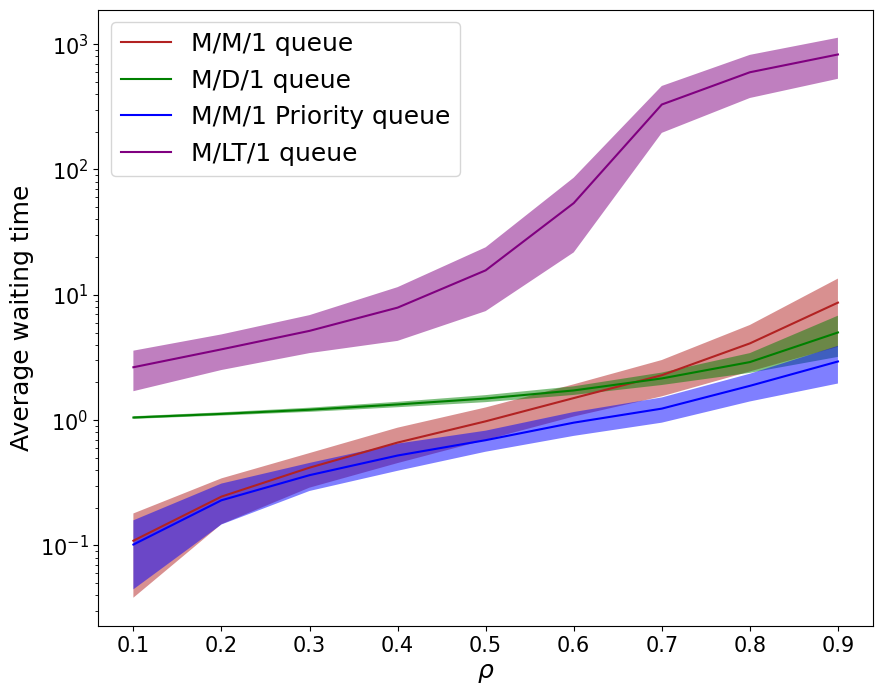

In [65]:
plt.figure(figsize=(10,8))

z = 1.96

plt.plot(rhos, saved_means["mm1"], label="M/M/1 queue", color="firebrick")
N = math.sqrt(len(saved_means["mm1"]))
plt.fill_between(rhos,
                        [saved_means["mm1"][i] - z * stds["mm1"][i] / N for i in range(len(saved_means["mm1"]))],
                        [saved_means["mm1"][i] + z * stds["mm1"][i] / N for i in range(len(saved_means["mm1"]))],
                        facecolor="firebrick",
                        alpha=0.5)


plt.plot(rhos, saved_means["md1"], label="M/D/1 queue", color="green")
N = math.sqrt(len(saved_means["md1"]))
plt.fill_between(rhos,
                        [saved_means["md1"][i] - z * stds["md1"][i] / N for i in range(len(saved_means["md1"]))],
                        [saved_means["md1"][i] + z * stds["md1"][i] / N for i in range(len(saved_means["md1"]))],
                        facecolor="green",
                        alpha=0.5)


plt.plot(rhos, saved_means["prior1"], label="M/M/1 Priority queue", color="blue")
N = math.sqrt(len(saved_means["prior1"]))
plt.fill_between(rhos,
                        [saved_means["prior1"][i] - z * stds["prior1"][i] / N for i in range(len(saved_means["prior1"]))],
                        [saved_means["prior1"][i] + z * stds["prior1"][i] / N for i in range(len(saved_means["prior1"]))],
                        facecolor="blue",
                        alpha=0.5)

plt.plot(rhos, saved_means["mlt1"], label="M/LT/1 queue", color="purple")
N = math.sqrt(len(saved_means["mlt1"]))
plt.fill_between(rhos,
                        [saved_means["mlt1"][i] - z * stds["mlt1"][i] / N for i in range(len(saved_means["mlt1"]))],
                        [saved_means["mlt1"][i] + z * stds["mlt1"][i] / N for i in range(len(saved_means["mlt1"]))],
                        facecolor="purple",
                        alpha=0.5)


plt.legend(prop={'size': 18})
plt.xticks(size=15)
plt.yticks(size=15)
# plt.title("Queue lengths for different queues with 1 server", size=25)
plt.yscale("log")
plt.ylabel("Average waiting time", size=18)
plt.xlabel("$\\rho$", size=18)
plt.savefig("plots/everything-together-log.png", dpi=300)
# plt.show()

In [67]:
queue_types = ["mm1", "mm2", "mm4", "md1", "md2", "md4", "prior1", "prior2", "prior4" , "mlt1", "mlt2", "mlt4"]

saved_means = {}
stds = {}

for queue_type in queue_types:
    df = pd.read_csv("data/" + queue_type + "_means.csv")
    if queue_type[:-1]=='mlt':
        df.columns = ["rho","arrive", "waitingtime", "len_queue"]
    else: df.columns = ["rho", "waitingtime", "len_queue"]

    # servers = [1, 2, 4]
    rho = 0.4 
    print(rho)

    means_per_server = []
    stds_per_server = []

    print("queue: ", queue_type, "rho: ", rho)

    mean = df[df["rho"] == rho]["waitingtime"].mean()
    std = df[df["rho"] == rho]["waitingtime"].std()

    means_per_server.append(mean)
    stds_per_server.append(std)

    saved_means[queue_type] = means_per_server
    stds[queue_type] = stds_per_server



0.4
queue:  mm1 rho:  0.4
0.4
queue:  mm2 rho:  0.4
0.4
queue:  mm4 rho:  0.4
0.4
queue:  md1 rho:  0.4
0.4
queue:  md2 rho:  0.4
0.4
queue:  md4 rho:  0.4
0.4
queue:  prior1 rho:  0.4
0.4
queue:  prior2 rho:  0.4
0.4
queue:  prior4 rho:  0.4
0.4
queue:  mlt1 rho:  0.4
0.4
queue:  mlt2 rho:  0.4
0.4
queue:  mlt4 rho:  0.4


In [69]:

grouped_means = {'mm':[], 'md':[], 'prior':[], 'mlt':[]}
for val in saved_means.keys():
    if val[:-1]=='mm':
        grouped_means['mm'].append(saved_means[val])
    if val[:-1]=='md':
        grouped_means['md'].append(saved_means[val])
    if val[:-1]=='prior':
        grouped_means['prior'].append(saved_means[val])
    if val[:-1]=='mlt':
        grouped_means['mlt'].append(saved_means[val])
    
    #grouped_means[val[0:-1]] = list(np.array(grouped_means[val[:-1]]).flatten())

In [70]:
grouped_means

{'mm': [[0.6623057565739716], [0.19021339639532617], [0.038517460607663305]],
 'md': [[1.3335774201161905], [1.0991642516670022], [1.0219794117274368]],
 'prior': [[0.5218846629258838], [0.15110094911720726], [0.03145246667174244]],
 'mlt': [[7.898973811130115], [4.195411349143621], [2.759698665617883]]}

In [71]:
grouped_stds = {'mm':[], 'md':[], 'prior':[], 'mlt':[]}
for val in stds.keys():
    if val[:-1]=='mm':
        grouped_stds['mm'].append(stds[val])
    if val[:-1]=='md':
        grouped_stds['md'].append(stds[val])
    if val[:-1]=='prior':
        grouped_stds['prior'].append(stds[val])
    if val[:-1]=='mlt':
        grouped_stds['mlt'].append(stds[val])

In [72]:
grouped_stds

{'mm': [[0.3185082896138641], [0.08837178007931264], [0.02292916089068145]],
 'md': [[0.10170623603932366], [0.02944743327818561], [0.0086186037863463]],
 'prior': [[0.1953791954469051],
  [0.051656069586714815],
  [0.013069809836537627]],
 'mlt': [[5.525650974862662], [1.894668272695389], [0.7327013953403815]]}

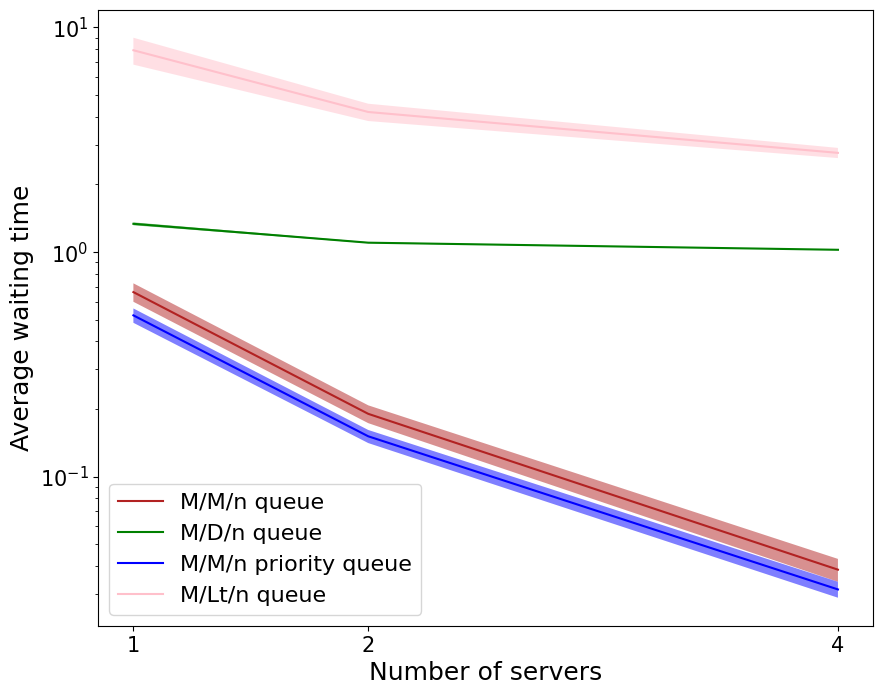

In [84]:
servers = [1, 2, 4]

z = 1.96
N = np.sqrt(100)
plt.figure(figsize=(10,8))
plt.plot(servers, grouped_means['mm'], label = 'M/M/n queue', color="firebrick",)
plt.plot(servers, grouped_means['md'], label = 'M/D/n queue', color="green",)
plt.plot(servers, grouped_means['prior'], label = 'M/M/n priority queue', color ='blue')
plt.plot(servers, grouped_means['mlt'], label = 'M/Lt/n queue', color ='pink')
plt.fill_between(servers,
                        [grouped_means['mm'][i][0] - z * grouped_stds['mm'][i][0] / N for i in range(len(grouped_means['mm']))],
                        [grouped_means['mm'][i][0] + z * grouped_stds['mm'][i][0] / N for i in range(len(grouped_means['mm']))],
                        facecolor="firebrick",
                        alpha=0.5)
plt.fill_between(servers,
                        [grouped_means['md'][i][0] - z * grouped_stds['md'][i][0] / N for i in range(len(grouped_means['md']))],
                        [grouped_means['md'][i][0] + z * grouped_stds['md'][i][0] / N for i in range(len(grouped_means['md']))],
                        facecolor="green",
                        alpha=0.5)
plt.fill_between(servers,
                        [grouped_means['prior'][i][0] - z * grouped_stds['prior'][i][0] / N for i in range(len(grouped_means['prior']))],
                        [grouped_means['prior'][i][0] + z * grouped_stds['prior'][i][0] / N for i in range(len(grouped_means['prior']))],
                        facecolor="blue",
                        alpha=0.5)
plt.fill_between(servers,
                        [grouped_means['mlt'][i][0] - z * grouped_stds['mlt'][i][0] / N for i in range(len(grouped_means['mlt']))],
                        [grouped_means['mlt'][i][0] + z * grouped_stds['mlt'][i][0] / N for i in range(len(grouped_means['mlt']))],
                        facecolor="pink",
                        alpha=0.5)
plt.legend(prop={'size': 16})
plt.xticks(size=15)
plt.yticks(size=15)
plt.yscale("log")
plt.ylabel("Average waiting time", size=18)
plt.xticks([1,2,4])
plt.xlabel("Number of servers", size=18)
plt.savefig("plots/everything-together-log-servers.png", dpi=300)
plt.show()